In [34]:
%matplotlib inline

from pathlib import Path
import json

import numpy as np
from matplotlib import pyplot as plt

plt.style.use('ggplot')

In [3]:
logs_dir = Path("../logs")

def load_json(filename):
    with open(filename, "r") as f:
        result = json.load(f)
    return result

In [56]:
logs = {
    key: load_json(filename)
    for key, filename in (
        ("MCTS", logs_dir / "MCTS_10_DDS.json"),
        ("RNN", logs_dir / "RNN_10_DDS.json")
    )
}
logs.keys()

dict_keys(['MCTS', 'RNN'])

In [57]:
declarer_logs = {
    k: [m for m in l if m['is_declarer']]
    for k, l in logs.items()
}
defender_logs = {
    k: [m for m in l if not m['is_declarer']]
    for k, l in logs.items()
}

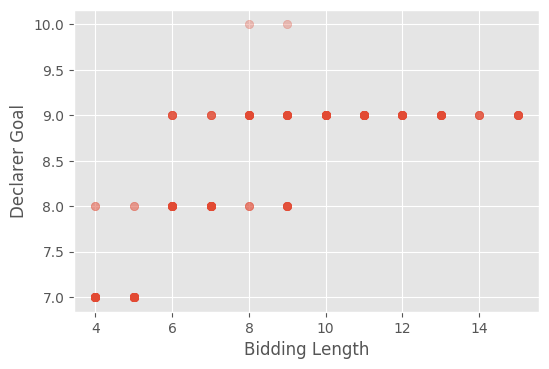

In [78]:
plt.figure(dpi=100)
plt.scatter(
    [m['bidding_length'] for l in declarer_logs.values() for m in l],
    [m['declarer_goal'] for l in declarer_logs.values() for m in l],
    alpha=.3
)
plt.xlabel('Bidding Length')
plt.ylabel('Declarer Goal')
plt.show()

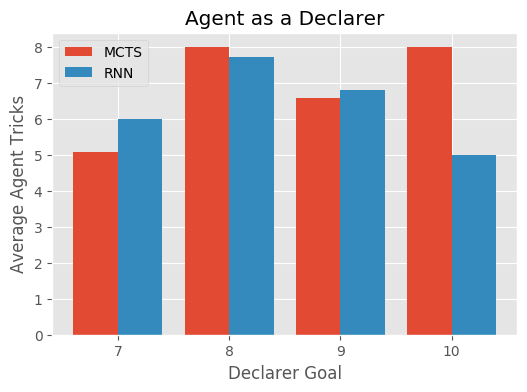

In [71]:
min_goal = min([m['declarer_goal'] for l in declarer_logs.values() for m in l])
max_goal = max([m['declarer_goal'] for l in declarer_logs.values() for m in l])
width = .4
plt.figure(dpi=100)
for i, l in enumerate(declarer_logs.values()):
    bar = [
        np.mean([m['tricks'] for m in l if m['declarer_goal'] == g])
        for g in range(min_goal, max_goal+1)
    ]
    plt.bar(np.arange(min_goal, max_goal+1) + i * width, bar, width=width)
plt.legend(declarer_logs.keys())
plt.xticks(np.arange(min_goal, max_goal+1) + width / 2, np.arange(min_goal, max_goal+1))
plt.title('Agent as a Declarer')
plt.ylabel('Average Agent Tricks')
plt.xlabel('Declarer Goal')
plt.show()

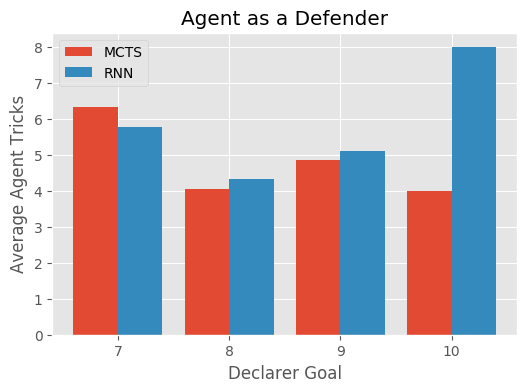

In [72]:
min_goal = min([m['declarer_goal'] for l in defender_logs.values() for m in l])
max_goal = max([m['declarer_goal'] for l in defender_logs.values() for m in l])
width = .4
plt.figure(dpi=100)
for i, l in enumerate(defender_logs.values()):
    bar = [
        np.mean([m['tricks'] for m in l if m['declarer_goal'] == g])
        for g in range(min_goal, max_goal+1)
    ]
    plt.bar(np.arange(min_goal, max_goal+1) + i * width, bar, width=width)
plt.legend(defender_logs.keys())
plt.xticks(np.arange(min_goal, max_goal+1) + width / 2, np.arange(min_goal, max_goal+1))
plt.title('Agent as a Defender')
plt.ylabel('Average Agent Tricks')
plt.xlabel('Declarer Goal')
plt.show()

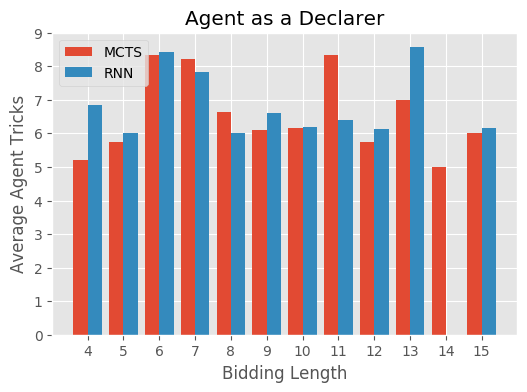

In [82]:
min_len = min([m['bidding_length'] for l in declarer_logs.values() for m in l])
max_len = max([m['bidding_length'] for l in declarer_logs.values() for m in l])
width = .4
plt.figure(dpi=100)
for i, l in enumerate(declarer_logs.values()):
    bar = [
        np.mean([m['tricks'] for m in l if m['bidding_length'] == g])
        for g in range(min_len, max_len+1)
    ]
    plt.bar(np.arange(min_len, max_len+1) + i * width, bar, width=width)
plt.legend(declarer_logs.keys())
plt.xticks(np.arange(min_len, max_len+1) + width / 2, np.arange(min_len, max_len+1))
plt.title('Agent as a Declarer')
plt.ylabel('Average Agent Tricks')
plt.xlabel('Bidding Length')
plt.show()

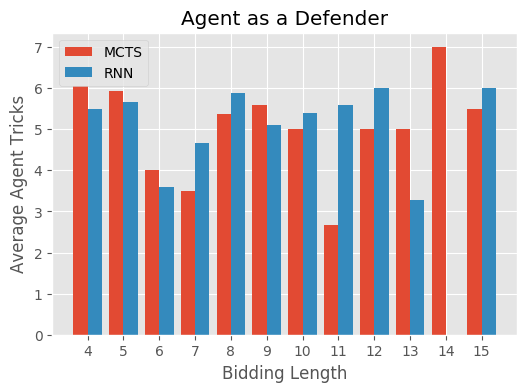

In [83]:
min_len = min([m['bidding_length'] for l in defender_logs.values() for m in l])
max_len = max([m['bidding_length'] for l in defender_logs.values() for m in l])
width = .4
plt.figure(dpi=100)
for i, l in enumerate(defender_logs.values()):
    bar = [
        np.mean([m['tricks'] for m in l if m['bidding_length'] == g])
        for g in range(min_len, max_len+1)
    ]
    plt.bar(np.arange(min_len, max_len+1) + i * width, bar, width=width)
plt.legend(defender_logs.keys())
plt.xticks(np.arange(min_len, max_len+1) + width / 2, np.arange(min_len, max_len+1))
plt.title('Agent as a Defender')
plt.ylabel('Average Agent Tricks')
plt.xlabel('Bidding Length')
plt.show()

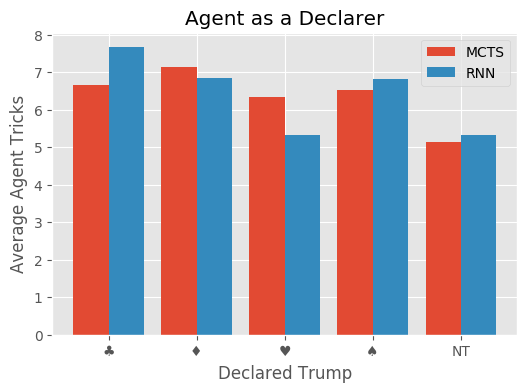

In [91]:
width = .4
plt.figure(dpi=100)
for i, l in enumerate(declarer_logs.values()):
    bar = [
        np.mean([m['tricks'] for m in l if m['trump'] == t])
        for t in range(5)
    ]
    plt.bar(np.arange(5) + i * width, bar, width=width)
plt.legend(declarer_logs.keys())
plt.xticks(np.arange(5) + width / 2, ['♣', '♦', '♥', '♠', 'NT'])
plt.title('Agent as a Declarer')
plt.ylabel('Average Agent Tricks')
plt.xlabel('Declared Trump')
plt.show()

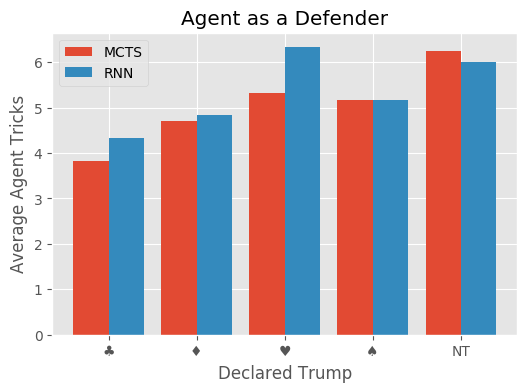

In [92]:
width = .4
plt.figure(dpi=100)
for i, l in enumerate(defender_logs.values()):
    bar = [
        np.mean([m['tricks'] for m in l if m['trump'] == t])
        for t in range(5)
    ]
    plt.bar(np.arange(5) + i * width, bar, width=width)
plt.legend(defender_logs.keys())
plt.xticks(np.arange(5) + width / 2, ['♣', '♦', '♥', '♠', 'NT'])
plt.title('Agent as a Defender')
plt.ylabel('Average Agent Tricks')
plt.xlabel('Declared Trump')
plt.show()